# Métodos basados en datos

## Bivariados
En los métodos bivariados cada mapa factor (geología, pendiente, coberturas, etc) es combinado con el inventario de movimientos en masa, para obtener los pesos de las clases que conforman las variables, basados generalmente en densidad de movimientos en masa. Los métodos estadísticos bivariados son una buena herramienta de aprendizaje para el analista encontrar qué factores o combinación de factores juegan un papel importante en la ocurrencia de movimientos en masa. 

Como se mencionó anteriormente, estos métodos están basados en la asociación observada entre la distribución de los movimientos en masa y cada clase de la variable, lo que exige que cada variable sea transforamda a una variable categórica dividida por clases. De esta misma forma los métodos bivariados sólo permiten asignar peso a las clases y no a las variables, por lo que todas las variables tienen una importancia igual sobre la ocurrencia de movimientos en masa. Considerando esta desventaja, es muy común combinar los métodos estadísticos bivariados con métodos heurísticos como AHP para poder asignar peso a las variables.

Existe uan gran cantidad de métodos estadísticos bivariados, los cuales se subdividen esencialmente en métodos basados en la densidad del número de movimientos en masa en cada clase (*Frequency ratio*, *Statistical index*), y los métodos basados en el teorema de Bayes (*Weight-of-evidence*, *Evidential belief function*,  *Certainty factor*).

### *Frequency ratio model* (*Likelihood*)
Este método, al igual que todos los métodos bivariados, calcula un peso para cada clase en la cual es dividida cada variable. En este caso el peso de la clase n ($w_n$) se calcula dividiendo la relación de la ocurrencia de movimientos en masa ($L_r$) por la relación del área de la clase ($A_r$):

$w_n = \frac{L_r}{A_r}$

Donde $L_r$ es el porcentaje de movimientos en masa total que contiene la clase $n$, y $A_r$ es el porcentaje del área total de representa dicha clase:

$L_r = \frac{L_{clase}}{L_{total}}$

$A_r = \frac{A_{clase}}{A_{total}}$

Finalmente, la susceptibilidad de una celda es igual a la sumatoria del peso de cada clase ($w$) a la que pertenece en cada variable:

$S^n = \sum w = w_{pendiente} + w_{geologia} + w_{coberturas} + ...w_{n} $

:::{figure-md} likehood
<img src="https://www.researchgate.net/profile/Jangwon-Suh-3/publication/303875920/figure/fig1/AS:371153064480768@1465501194778/Example-for-calculating-frequency-ratio-using-raster-grids-modified-from-Oh-et-al.png" alt="likehood" width="600px">

Método de *Frequency ratio*. Tomado de Suh et al. (2015)
:::

#### *Python*

En el presente ejemplo, y solo con propósitos pedagógicos, se utilizarán solo tres variables (pendiente, geologia, aspecto) pero el procedimiento señalado se debera utilizar para todas las variables incorporadas en el modelo de susceptibilidad.

Inicialmente se procede a importar las librerías a utilizar:

In [119]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A continuación se importa el inventario de movimientos en masa, así como los mapas de las variables predictoras a utilizar:

(910801,)

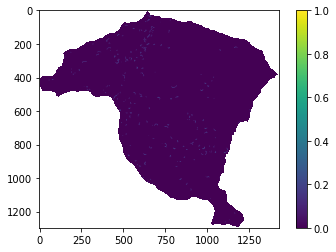

In [115]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/Inventario_MenM.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/Pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

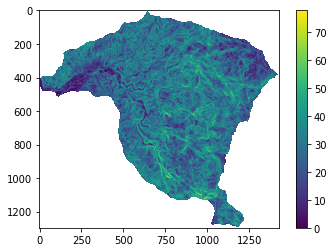

In [116]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/Pendiente.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente);
plt.colorbar();
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]

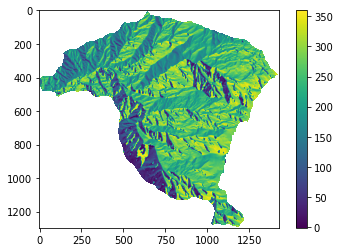

In [117]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/Aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()

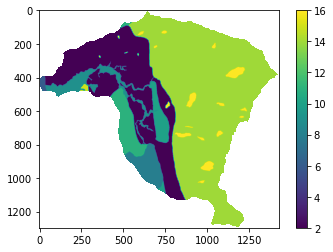

In [118]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/Geologia_Superficial.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia<0,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar();

Para implementar el método de *Frequency ratio* se deben conocer para cada clase de las variables, el número de celdas que pertenecen a dicha clase y el número de celdas con MenM.

A continuación se presenta el procedimiento para el mapa de pendiente, el cual es una variable continua. Como se mencionó anteriormente en los metodos estadísticos bivariados se deben transformar las variables continuas a categóricas. En este caso el mapa de pendientes se convierte a 5 clases [0-10, 10-20, 20-30, 30-35, >35]. Para realizar este procedimiento se utiliza el vector que se generó con el mapa de pendiente, y se convierte a una serie de Pandas, de tal forma que permita iterar.

In [120]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
a=b=c=d=e=0
for row in pendiente_serie:
        if (0 <= row) & (row < 10):
          a+=1
        elif (10 <= row) & (row < 20):
          b+=1
        elif (20 <= row) & (row < 30):
          c+=1
        elif (30 <= row) & (row < 35):
          d+=1
        if (row>=35):
          e+=1

total=a+b+c+d+e
print("total:", total,a,b,c,d,e)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
a1=b1=c1=d1=e1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 10):
          a1+=1
        elif (10 <= row) & (row < 20):
          b1+=1
        elif (20 <= row) & (row < 30):
          c1+=1
        elif (30 <= row) & (row < 35):
          d1+=1
        if (row>=35):
          e1+=1

total1=a1+b1+c1+d1+e1
print("total1:", total1,a1,b1,c1,d1,e1)

total 910801 53805 138684 279488 158011 280813
total1 1620 13 108 411 301 787


Ahora se calcula el *Frequency ratio* para cada clase a partir de los valores estimados previamente:

In [121]:
w_a=(a1/total1)/(a/total)
w_b=(b1/total1)/(b/total)
w_c=(c1/total1)/(c/total)
w_d=(d1/total1)/(d/total)
w_e=(e1/total1)/(e/total)
print(w_a,w_b,w_c,w_d,w_e)

0.13584047790317347 0.4378303673579264 0.826774627307924 1.0709955300033418 1.5756726885555798


Finalmente se reclasifica el mapa, asignándole a cada clase el valor del *Frequency ratio* calculado:

[0.13584048 0.43783036 0.82677466 1.0709956  1.5756727         nan]


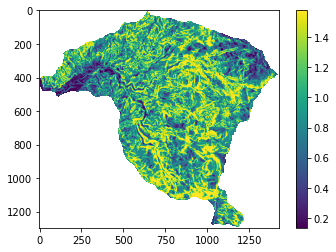

In [122]:
pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),w_a,pendiente )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<20 )),w_b,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=20, pendiente_c<30 )),w_c,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=30, pendiente_c<35 )),w_d,pendiente_c )
pendiente_c=np.where ( pendiente_c>=35,w_e,pendiente_c )

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

Ahora se realiza el mismo procedimiento para la variable *aspecto*, la cual tambien es continua, en este caso se divide en 4 clases [0-90, 90-180, 180-270, 270-360]:

total: 909599 151110 128456 306544 323489
total1: 1620 271 401 469 479
w: 1.0069572774636415 1.7527700266488904 0.8590431563124444 0.8314017909437948
[-1.          0.83140177  0.8590432   1.0069573   1.7527701          nan]


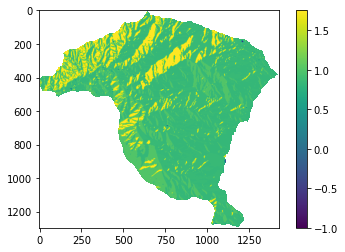

In [123]:
aspecto_serie=pd.Series(aspecto_vector_MenM)
a=b=c=d=0
for row in aspecto_serie:
        if (0 <= row) & (row < 90):
          a+=1
        elif (90 <= row) & (row < 180):
          b+=1
        elif (180 <= row) & (row < 270):
          c+=1
        if (row>=270):
          d+=1

total=a+b+c+d
print("total:", total,a,b,c,d)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
a1=b1=c1=d1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 90):
          a1+=1
        elif (90 <= row) & (row < 180):
          b1+=1
        elif (180 <= row) & (row < 270):
          c1+=1
        if (row>=270):
          d1+=1

total1=a1+b1+c1+d1
print("total1:", total1,a1,b1,c1,d1)

w_a=(a1/total1)/(a/total)
w_b=(b1/total1)/(b/total)
w_c=(c1/total1)/(c/total)
w_d=(d1/total1)/(d/total)
print("w:", w_a,w_b,w_c,w_d)

aspecto_c=np.where ( (np.logical_and (aspecto>=0, aspecto<90 )),w_a,aspecto )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=90, aspecto_c<180 )),w_b,aspecto_c )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=180, aspecto_c<270 )),w_c,aspecto_c )
aspecto_c=np.where ( aspecto_c>=270,w_d,aspecto_c )

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

Y el mismo procedimiento para la variable *geologia*, la cual es categórica por lo cual ligeramente varía el procedimiento.

total 237383 169 3060 32352 37658 22405 41720 515621 1850 18583
total1 612 0 0 98 0 43 118 736 13 0
w: 1.4494735418196658 0.0 0.0 1.703073635991745 0.0 1.0790262039172254 1.5901796515275262 0.8025196993073269 3.9507550884217553 0.0
[0.         0.8025197  1.0790262  1.44947354 1.59017965 1.70307364
 3.95075509        nan]


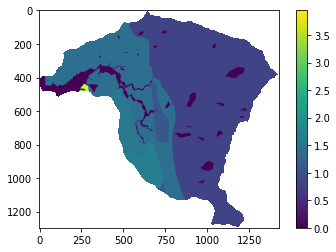

In [124]:
a=(geologia == 2).sum()
b=(geologia == 4).sum()
c=(geologia == 6).sum()
d=(geologia == 8).sum()
e=(geologia == 9).sum()
f=(geologia == 10).sum()
g=(geologia == 11).sum()
h=(geologia == 14).sum()
i=(geologia == 15).sum()
j=(geologia == 16).sum()

total=a+b+c+d+e+f+g+h+i+j
print("total", a,b,c,d,e,f,g,h,i,j)

geologiaconMenM=geologia*inventario
a1=(geologiaconMenM == 2).sum()
b1=(geologiaconMenM == 4).sum()
c1=(geologiaconMenM == 6).sum()
d1=(geologiaconMenM == 8).sum()
e1=(geologiaconMenM == 9).sum()
f1=(geologiaconMenM == 10).sum()
g1=(geologiaconMenM == 11).sum()
h1=(geologiaconMenM == 14).sum()
i1=(geologiaconMenM == 15).sum()
j1=(geologiaconMenM == 16).sum()

total1=a1+b1+c1+d1+e1+f1+g1+h1+i1+j1
print("total1", a1,b1,c1,d1,e1,f1,g1,h1,i1,j1)

w_a=(a1/total1)/(a/total)
w_b=(b1/total1)/(b/total)
w_c=(c1/total1)/(c/total)
w_d=(d1/total1)/(d/total)
w_e=(e1/total1)/(e/total)
w_f=(f1/total1)/(f/total)
w_g=(g1/total1)/(g/total)
w_h=(h1/total1)/(h/total)
w_i=(i1/total1)/(i/total)
w_j=(j1/total1)/(j/total)
print("w:", w_a,w_b,w_c,w_d,w_e,w_f,w_g,w_h,w_i,w_j)

geologia_c=np.where ( geologia==2,w_a,geologia )
geologia_c=np.where ( geologia_c==4,w_b,geologia_c )
geologia_c=np.where ( geologia_c==6,w_c,geologia_c )
geologia_c=np.where ( geologia_c==8,w_d,geologia_c )
geologia_c=np.where ( geologia_c==9,w_e,geologia_c )
geologia_c=np.where ( geologia_c==10,w_f,geologia_c  )
geologia_c=np.where ( geologia_c==11,w_g,geologia_c  )
geologia_c=np.where ( geologia_c==14,w_h,geologia_c  )
geologia_c=np.where ( geologia_c==15,w_i,geologia_c  )
geologia_c=np.where ( geologia_c==16,w_j,geologia_c  )

plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

Con los mapas de cada variable reclasificados de acuerdo con el valor de *Frequency ratio* se procede entonces a sumar todas las variables y obtener el mapa de susceptibilidad:

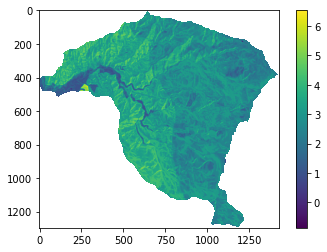

In [125]:
IS=pendiente_c+aspecto_c+geologia_c
plt.imshow(IS);
plt.colorbar();

### *Statistical index model*
El valor del peso para cada clase en el método *Statistical index model* es definido como el logaritmo natural de la densidad de movimientos en masa en una clase ($\rho_{clase}$) dividido la densidad de deslizamientos en toda la zona de estudio ($\rho_{total}$), de acuerdo con la siguiente ecuación:

$w_{ij}^n = \ln(\frac{\rho_{clase}}{\rho_{total}}) = \ln(\frac{\frac{N_{ij}}{S_{ij}}}{\frac{N}{S}}) $

Donde $w_{ij}^n$ es el peso de la celda $n$ que pertenece a la clase $i$ de la variable $j$. $\rho_{clase}$ es la densidad de deslizamientos de la clase $i$ del parámetro $j$, calculado a  partir de $N_{ij}$ como el número de pixeles con MenM en una cierta clase $i$ del parametro $j$, $S_{ij} como el número de pixeles de la clase $i$ del parametro $j$. N es el total de celdas que corresponden a deslizamientos en todo el mapa y S es el total de celdas del área de estudio.

Finalmente la susceptibilidad a movimientos en masa de cada celda es igual a:

$S^n = \sum w = w_{pendiente} + w_{geologia} + w_{coberturas} + ...w_{n} $

#### Python

En el presente ejemplo, y solo con propósitos pedagógicos, se utilizarán solo tres variables (pendiente, geologia, aspecto) pero el procedimiento señalado se debera utilizar para todas las variables incorporadas en el modelo de susceptibilidad.

### Peso de la evidencia (WoE)
El Peso de la Evidencia, basado en la teoría de la probabilidad Bayesiana, analiza la relación entre las áreas afectadas 
por los movimientos en masa y la distribución espacial de los factores condicionantes del terreno. Este método arroja 
los pesos de las clases que conforman las variables condicionantes, indicando la presencia e influencia de la clase como parámetro 
en la ocurrencia del movimiento en masa. Los pesos positivos (W+)  indican la presencia de la clase como parámetro que 
favorece los movimientos en masa y su magnitud indica su correlación. El peso negativo (W-) indica la ausencia de la clase en la ocurrencia de 
movimiento en masa. 

Dónde $N_{pix1}$ es el número de pixeles con movimientos en masa ($S$) en la clase $B_i$, $N_{pix2}$ número de pixeles con movimientos 
en masa que no están presentes en la misma clase $\hat{B}_i$, $N_{pix3}$ es el número de pixeles en la clase que no hay movimientos 
en masa $\hat{S}$ y $N_{pix4}$ es el número de pixeles en la clase donde no hay movimientos en masa $\hat{S}$ y que no está presente en 
la clase  $\hat{B}_i$.

:::{figure-md} woe
<img src="https://i.pinimg.com/564x/70/a4/d5/70a4d5ecbab6d6bf9bdb0f914c91dba8.jpg" alt="woe" width="600px">

Método de Peso de la Evidencia.
:::

$C = W^+ - W^-$

Y el contraste C refleja el espacio de asociación respecto a la clase en la predicción del movimiento en masa, la cual 
es cero cuando la clase no afecta, es positivo cuando existe una correlación directa y negativo cuando existe una correlación inversa con la distribución de movimientos en masa.

#### Python

Para calcular el $W^+$ (wp), $W^-$ (wn), y $C$ de cada clase del mapa de pendiente, el cual es un mapa continuo, se debe contar inicialmente cuantas celdas hay en los rangos que se establezcan.

In [ ]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
a=b=c=d=e=0
for row in pendiente_serie:
        if (0 <= row) & (row < 10):
          a+=1
        elif (10 <= row) & (row < 20):
          b+=1
        elif (20 <= row) & (row < 30):
          c+=1
        elif (30 <= row) & (row < 35):
          d+=1
        if (row>=35):
          e+=1

total=a+b+c+d+e
print("total:", a,b,c,d,e,total)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM

a1=b1=c1=d1=e1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 10):
          a1+=1
        elif (10 <= row) & (row < 20):
          b1+=1
        elif (20 <= row) & (row < 30):
          c1+=1
        elif (30 <= row) & (row < 35):
          d1+=1
        if (row>=35):
          e1+=1

total1=a1+b1+c1+d1+e1
print("total1", a1,b1,c1,d1,e1,total1)


53805 138684 279488 158011 280813 910801


De acuerdo con la ecuacion del método WoE: $N_{pix1}$=a1, son las celdas que pertenecen a la clase a y tienen MenM. $N_{pix2}$=total1-a1, son las celdas que no pertenecen a la clase a y que tienen MenM, $N_{pix3}$=a-a1, son las celdas que pertenecen a la clase a pero que no tienen MenM. y $N_{pix4}$=(b+c+d+e)-(b1+c1+d1+e1), son las celdas que no pertenecen a la clase a y que no tienen MenM.

In [ ]:
x1=a1
x2=total1-a1
x3=a-a1
x4=(b+c+d+e)-(b1+c1+d1+e1)

Con los valores de x1, x2, x3, x4 se calculan el $W^+$ (wp), el $W^-$ (Wn) y el Contraste de la siguiente forma:

In [ ]:
wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_a, wn_a, c)

-2.365127685703442 0.08123986981187707 -2.4463675555153186


Con el valor del contraste para la clase $a$ del mapa de pendiente, se genera un mapa de pendiente reclasificado donde todas las celdas que pertenezcan a la clase a ahora tengan el valor del contraste de $a$.

In [ ]:
pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),c,pendiente );

Ahora se repite el mismo procedimiento para cada una de las clases en las cuales se clasificó el mapa de pendientes.

In [ ]:
#Clase b
x1=b1
x2=total1-b1
x3=b-b1
x4=(a+c+d+e)-(a1+c1+d1+e1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<20 )),cont,pendiente_c )

#Clase c
x1=c1
x2=total1-c1
x3=c-c1
x4=(a+b+d+e)-(a1+b1+d1+e1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<20 )),cont,pendiente_c )

#Clase d
x1=d1
x2=total1-d1
x3=d-d1
x4=(a+b+c+e)-(a1+b1+c1+e1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=20, pendiente_c<30 )),cont,pendiente_c )

#Clase e
x1=e1
x2=total1-e1
x3=e-e1
x4=(a+b+c+d)-(a1+b1+c1+d1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( pendiente_c>=30,cont,pendiente_c )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


Se procede a imprimir cada uno de los $W^+$ y $W^-$ para detectar valores infinitos que se obtienen de logaritmos de 0, es decir que provienen de clases donde algunos de los numeradores (x1, x2, x3, o x4) es 0.

In [ ]:
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e)

-2.365127685703442 0.08123986981187707 -1.1942405986864522 0.1795582351477149 -0.190531748869874 0.0740267315295358 -0.2986005529725735 0.0827384536897787 0.0883928781942713 -0.0768935487691998


A continuación se presenta el mapa de pendiente reclasificado por el Contraste (C)

[-2.0507433  -1.373798   -0.38133818  0.16528755         nan]


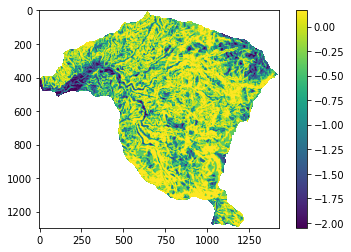

In [ ]:
plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

Este mismo procedimiento se realiza para la variable *aspecto*.

In [ ]:
aspecto_serie=pd.Series(aspecto_vector_MenM)
a=b=c=d=0
for row in aspecto_serie:
        if (0 <= row) & (row < 90):
          a+=1
        elif (90 <= row) & (row < 180):
          b+=1
        elif (180 <= row) & (row < 270):
          c+=1
        if (row>=270):
          d+=1

total=a+b+c+d
print(a,b,c,d)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM

a1=b1=c1=d1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 90):
          a1+=1
        elif (90 <= row) & (row < 1800):
          b1+=1
        elif (180 <= row) & (row < 270):
          c1+=1
        if (row>=270):
          d1+=1

total1=a1+b1+c1+d1
#c1=1 #linea que se debe correr para este ejemplo, mas adelante se explica el motivo.
print(a1,b1,c1,d1)

#Clase a
x1=a1
x2=total1-a1
x3=a-a1
x4=(b+c+d)-(b1+c1+d1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto>=0, aspecto<90 )),cont,aspecto )

#Clase b
x1=b1
x2=total1-b1
x3=b-b1
x4=(a+c+d)-(a1+c1+d1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=90, aspecto_c<180 )),cont,aspecto_c )

#Clase c
x1=c1
x2=total1-c1
x3=c-c1
x4=(a+b+d)-(a1+b1+d1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=180, aspecto_c<270 )),cont,aspecto_c )

#Clase d
x1=d1
x2=total1-d1
x3=d-d1
x4=(a+b+c)-(a1+b1+c1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where (aspecto_c>=270,cont,aspecto_c )

151110 128456 306544 323489
271 1349 1 479


In [ ]:
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d)

-0.252618077557853 0.04353988520764823 1.523565749174001 -0.8782470066234108 -6.5638818947844895 0.41169421280498103 -0.444506540695429 0.18091961138463641


En este caso wp_c arroja un valor de *-inf*. Lo cual era de esperarse ya que como habiamos obtenido en la linea de codigo anterior c1=0, es decir no hay celdas de la clase c con MenM.

NOTA: Para eliminar este *-inf* se vuelve a correr el código para aspecto, pero en este caso se "descomenta" la linea donde se le asigna a c1 un valor de 1. De esta forma se elimina el *-inf*. Tenga en cuenta que en este caso corresponde a c1, pero para cada caso esto puede ser diferente, por lo tanto se debe realizar esta asignación con la clase que corresponda, o modificar el código de tal forma que si se obtiene un cero se asigna automáticamente un valor de 1. Se prefiere de esta forma manual para poder detectar donde se están realizando los ajustes.

A continuación se presenta el mapa de aspecto reclasificado por el Contraste (C)

[-6.975576   -1.         -0.6254262  -0.29615796  2.4018128          nan]


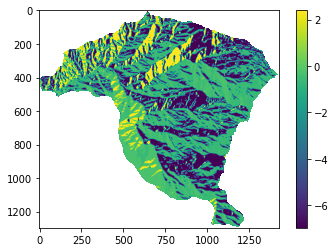

In [ ]:
plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

Para el mapa de Geologia se realiza un procedimiento similar, pero se debe tener en cuenta en este caso que Geología es una variable categórica, por lo cual no es necesario reclasificarla.

De forma similar se debe calcular el número de celdas que hay en cada clase, y el numero de celdas en cada clase con MenM. Los valores de x1, x2, x3, y x4 se calcula de forma similar, al igual que el $W^+$, $W^-$ y el Contraste.

In [ ]:
a=(geologia == 2).sum()
b=(geologia == 4).sum()
c=(geologia == 6).sum()
d=(geologia == 8).sum()
e=(geologia == 9).sum()
f=(geologia == 10).sum()
g=(geologia == 11).sum()
h=(geologia == 14).sum()
i=(geologia == 15).sum()
j=(geologia == 16).sum()

total=a+b+c+d+e+f+g+h+i+j
print(a,b,c,d,e,f,g,h,i,j)

geologiaconMenM=geologia*inventario
a1=(geologiaconMenM == 2).sum()
b1=(geologiaconMenM == 4).sum()
c1=(geologiaconMenM == 6).sum()
d1=(geologiaconMenM == 8).sum()
e1=(geologiaconMenM == 9).sum()
f1=(geologiaconMenM == 10).sum()
g1=(geologiaconMenM == 11).sum()
h1=(geologiaconMenM == 14).sum()
i1=(geologiaconMenM == 15).sum()
j1=(geologiaconMenM == 16).sum()

total1=a1+b1+c1+d1+e1+f1+g1+h1+i1+j1
#b1, c1, e1, j1= 1,1,1,1  #linea que se debe correr para este ejemplo, mas adelante se explica el motivo.
print(a1,b1,c1,d1,e1,f1,g1,h1,i1,j1)

#Clase a
x1=a1
x2=total1-a1
x3=a-a1
x4=(b+c+d+e+f+g+h+i+j)-(b1+c1+d1+e1+f1+g1+h1+i1+j1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where(geologia==2,cont,geologia)

#Clase b
x1=b1
x2=total1-b1
x3=b-b1
x4=(a+c+d+e+f+g+h+i+j)-(a1+c1+d1+e1+f1+g1+h1+i1+j1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==4,cont,geologia_c)

#Clase c
x1=c1
x2=total1-c1
x3=c-c1
x4=(a+b+d+e+f+g+h+i+j)-(a1+b1+d1+e1+f1+g1+h1+i1+j1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==6,cont,geologia_c)

#Clase d
x1=d1
x2=total1-d1
x3=d-d1
x4=(a+b+c+e+f+g+h+i+j)-(a1+b1+c1+e1+f1+g1+h1+i1+j1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==8,cont,geologia_c)

#Clase e
x1=e1
x2=total1-e1
x3=e-e1
x4=(a+b+c+d+f+g+h+i+j)-(a1+b1+c1+d1+f1+g1+h1+i1+j1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==9,cont,geologia_c)

#Clase f
x1=f1
x2=total1-f1
x3=f-f1
x4=(a+b+c+d+e+g+h+i+j)-(a1+b1+c1+d1+e1+g1+h1+i1+j1)

wp_f=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_f=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==10,cont,geologia_c)

#Clase g
x1=g1
x2=total1-g1
x3=g-g1
x4=(a+b+c+d+f+e+h+i+j)-(a1+b1+c1+d1+f1+e1+h1+i1+j1)

wp_g=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_g=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==11,cont,geologia_c)

#Clase h
x1=h1
x2=total1-h1
x3=h-h1
x4=(a+b+c+d+f+g+e+i+j)-(a1+b1+c1+d1+f1+g1+e1+i1+j1)

wp_h=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_h=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==14,cont,geologia_c)

#Clase i
x1=i1
x2=total1-i1
x3=i-i1
x4=(a+b+c+d+f+g+h+e+j)-(a1+b1+c1+d1+f1+g1+h1+e1+j1)

wp_i=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_i=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==15,cont,geologia_c)

#Clase j
x1=j1
x2=total1-j1
x3=j-j1
x4=(a+b+c+d+f+g+h+e+i)-(a1+b1+c1+d1+f1+g1+h1+e1+i1)

wp_j=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_j=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==16,cont,geologia_c)

237383 169 3060 32352 37658 22405 41720 515621 1850 18583
612 1 1 98 1 43 118 736 13 1


In [ ]:
print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e, wp_f, wn_f, wp_g, wn_g, wp_h, wn_h, wp_i, wn_i, wp_j, wn_j)

0.3719972196859115 -0.1727805096556783 1.2061496660464985 -0.0004326749733077856 -1.6957296987011459 0.002752779757529654 0.5336837785798685 -0.026280284312496238 -4.206160493471516 0.041683506509891124 0.07619539243600662 -0.0019984389181064706 0.4648947478986488 -0.02879076462367898 -0.2203550895609917 0.22972367754746886 1.3791739176961686 -0.006034509849750083 -3.4998350037515005 0.02003254146609238


Para este caso de la variable *geologia* se obtienen valores de 0 para las clases b, c, e y j. Por lo tanto se debe asignar valores de 1 y volver a correr el código.

[-4.247844   -3.51986755 -1.69848248 -0.45007877  0.07819383  0.49368551
  0.54477773  0.55996406  1.20658234  1.38520843         nan]


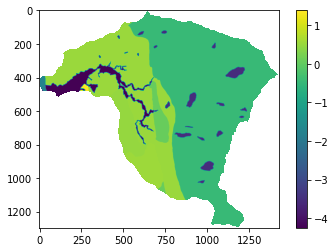

In [ ]:
plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

Finalmente se calcula el Indice de Susceptibildiad (IS), el cual corresponde a la suma de los mapas reclasificados con el valor del Contraste, de la siguiente forma.

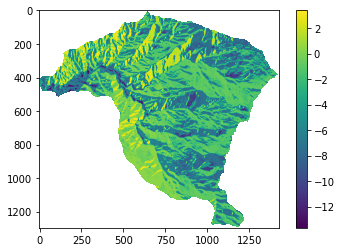

In [ ]:
IS=pendiente_c+aspecto_c+geologia_c
plt.imshow(IS);
plt.colorbar();

### *Evidential Belief Funtion* (EBF)
El modelo EBF (Dempster - Shafer) consiste en el grado de *Belief* (Bel), *Disbelief* (Dis), *Uncertainty* (Unc) y *Plausibility* (Pls), con valores entre 0 y 1. Bels y Pls representan el límite de probabilidad Bayesiana inferior y superior. Mientras que, Pls es mayor o igual que Bel, y Unc es la diferencia entre ellos, indicando la incertidumbre del resultado.

$Wc_{ij}L=\frac{N(c \cap L)/N(c)}{N(L)-N(c \cap L)/N(S)-N(c)}$

$Belc_{ij}=\frac{Wc_{ij}L}{\sum{Wc_{ij}L}}$
						
$Wc_{ij} \bar L=\frac{N(c)-N(c \cap L)/N(c)}{N(S)-N(L)-N(c)-N(c \cap L)/N(S)-N(c)}$

$Disc_{ij}=\frac{Wc_{ij} \bar L}{\sum{Wc_{ij} \bar L}}$
						
$Uncc_{ij}=1-Belc_{ij} - Disc_{ij}$

:::{figure-md} ebf
<img src="https://www.researchgate.net/profile/Hossein-Nazmfar-2/publication/234059633/figure/fig5/AS:637397922508801@1528978915684/Schematic-relationships-of-evidential-belief-functions-Althuwaynee-et-al-2012.png" alt="ebf" width="600px">

Método *Evidential Belief Funtion*.
:::

:::{figure-md} ebf1
<img src="https://i.pinimg.com/564x/4c/90/c3/4c90c30f26e6385e74bb00899a4f7110.jpg" alt="ebf1" width="400px">

Ejemplo del cálculo de *Evidential Belief Funtion*.
:::

### *Certainty Factor* (CF)
El valor de CF varía entre -1 y +1. Un valor positivo significa un incremento en la certidumbre de la ocurrencia de deslizamientos, mientras que un valor negativo corresponde a una reducción en dicha certidumbre. Un valor cercano a 0 significa que la probabilidad priori es muy similar a la probabilidad condicional.

:::{figure-md} cf
<img src="https://i.pinimg.com/originals/ae/1a/55/ae1a558572dffa10393f414d91a5bf24.jpg" alt="cf" width="400px">

Método de *Certainty Factor*.
:::

Donde PPa es la probabilidad condicional de la ocurrencia de un deslizamiento en la clase a. PPs es la probabilidad priori del número total de deslizamientos en el área.

Podemos exportar el mapa obtenido en formato Tif.

In [ ]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('Desktop/IS.TIF', 'w', 
              driver='Gtiff',height=pendiente.shape[0],width=pendiente.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);